<a href="https://colab.research.google.com/github/ag20327/CE888/blob/main/Lab4/my_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
np.set_printoptions(precision = 3)

In [3]:
#Import data and prepare it (no headers included, rename first column,replace Nan values)

df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", delimiter=",", header=None,na_values=99)
df_og=pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv", delimiter=",", header=None)
df.rename(columns = {0:'num_jokes_rated'}, inplace = True) 
#df.drop(columns=['num_jokes_rated'])
df_og.rename(columns = {0:'num_jokes_rated'}, inplace = True) 
print("The dataset has %d columns and %d rows" % (df.shape[1], df.shape[0]))
df.head()



The dataset has 101 columns and 24983 rows


,num_jokes_rated,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,74.0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,100.0,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.0,2.77,8.3,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49.0,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,48.0,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,91.0,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [47]:
#Drop the column of number of rated jokes
df=df.drop(columns="num_jokes_rated")
df_og=df_og.drop(columns="num_jokes_rated")
print("The dataset has %d columns and %d rows" % (df.shape[1], df.shape[0]))
df.head()


KeyError: ignored

In [54]:
df.iloc[23151,30]

7.09

In [76]:
#Best and worst rated jokes
averages=df.mean(axis=0)
averages_list=averages.values.tolist()

print("El minimo es: ",averages.min())
print("El max es: ",averages.max())

# inbuilt function to find the position of minimum  
minpos = averages_list.index(min(averages_list)) 
      
    # inbuilt function to find the position of maximum  
maxpos = averages_list.index(max(averages_list))  
      
    # printing the position  
print ("The maximum is at position", maxpos +1  )
print ("The minimum is at position", minpos +1 )



El minimo es:  -3.8338796373689923
El max es:  3.6650848950824937
The maximum is at position 50
The minimum is at position 58


In [7]:
result = df.iloc[[maxpos, minpos], [0]] 
result


,1
22710,9.22
10643,-9.90


In [8]:
df.loc[maxpos]

1      9.22
2      9.22
3      9.27
4      9.27
5      9.32
       ... 
96     9.37
97     9.27
98     9.27
99     9.32
100    9.32
Name: 22710, Length: 100, dtype: float64

In [9]:
df_og

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-

In [10]:
arr = df_og.values
print(arr.shape)
arr

(24983, 100)


array([[-7.82,  8.79, -9.66, ..., 99.  , 99.  , 99.  ],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       ...,
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [99.  , 99.  , 99.  , ..., 99.  , 99.  , 99.  ],
       [ 2.43,  2.67, -3.98, ..., 99.  , 99.  , 99.  ]])

In [11]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)
[rated[0][2], rated[1][2]] 

1810455 (1810455,)


[0, 2]

In [12]:
(rated[0][2], rated[1][2])

(0, 2)

In [13]:
def replace(orig, percentage):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [14]:
new_arr, idx = replace(arr, 0.1)

In [15]:
arr[idx[0][0], idx[1][0]]

3.74

In [16]:
new_arr[idx[0][0], idx[1][0]]

99.0

In [17]:
#Cambiar los 99 por nans
arr[arr==99]=np.nan
arr

array([[-7.82,  8.79, -9.66, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

In [18]:
new_arr[new_arr==99]=np.nan
new_arr

array([[-7.82,  8.79,   nan, ...,   nan,   nan,   nan],
       [ 4.08, -0.29,  6.36, ...,  0.34, -4.32,  1.07],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [ 2.43,  2.67, -3.98, ...,   nan,   nan,   nan]])

**Latent Factors**

In [19]:
n_latent_factors = 4
user_ratings = df_og.values
#user_ratings = new_arr
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

In [21]:
latent_item_features

array([[0.291, 0.575, 0.061, 0.37 ],
       [0.075, 0.253, 0.727, 0.012],
       [0.79 , 0.959, 0.657, 0.971],
       [0.876, 0.964, 0.874, 0.775],
       [0.18 , 0.252, 0.919, 0.188],
       [0.119, 0.165, 0.301, 0.98 ],
       [0.269, 0.901, 0.759, 0.394],
       [0.051, 0.661, 0.389, 0.841],
       [0.52 , 0.238, 0.251, 0.002],
       [0.578, 0.113, 0.261, 0.382],
       [0.828, 0.762, 0.556, 0.625],
       [0.409, 0.109, 0.546, 0.239],
       [0.545, 0.252, 0.951, 0.685],
       [0.714, 0.499, 0.224, 0.133],
       [0.663, 0.854, 0.779, 0.8  ],
       [0.259, 0.825, 0.316, 0.464],
       [0.283, 0.648, 0.24 , 0.363],
       [0.889, 0.936, 0.957, 0.206],
       [0.338, 0.182, 0.813, 0.578],
       [0.442, 0.168, 0.626, 0.48 ],
       [0.646, 0.909, 0.305, 0.321],
       [0.559, 0.877, 0.241, 0.773],
       [0.433, 0.497, 0.344, 0.34 ],
       [0.451, 0.305, 0.895, 0.681],
       [0.114, 0.289, 0.361, 0.812],
       [0.672, 0.751, 0.42 , 0.342],
       [0.782, 0.226, 0.092, 0.015],
 

In [46]:
latent_user_preferences

array([[0.971, 0.93 , 0.9  , 0.81 ],
       [0.279, 0.994, 0.654, 0.906],
       [0.892, 0.579, 0.917, 0.729],
       ...,
       [0.435, 0.221, 0.368, 0.611],
       [0.32 , 0.261, 0.935, 0.392],
       [0.878, 0.117, 0.226, 0.481]])

In [22]:
latent_user_preferences[0]

array([0.417, 0.488, 0.888, 0.512])

In [23]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if not np.isnan(rating):
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 10) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history

In [78]:
num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations


Iteration 0/100:	MSE=15.283871


KeyboardInterrupt: ignored

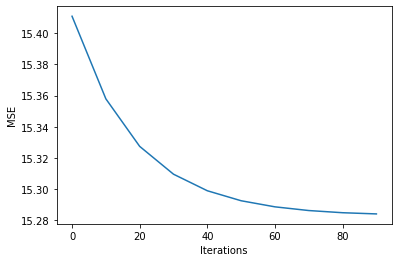

In [60]:
plt.figure()
plt.plot(np.arange(0, num_iter, 10), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [61]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-2.137, -2.709, -4.929, ..., -3.79 , -7.517, -3.722],
       [ 2.234,  3.853,  4.14 , ...,  4.153,  3.352,  4.717],
       [ 7.296,  6.273,  7.016, ...,  5.883,  7.286,  6.624],
       ...,
       [-2.374, -0.316, -1.189, ...,  1.76 , -2.272,  2.053],
       [-0.494,  0.459, -1.642, ..., -1.088, -5.403, -0.553],
       [ 2.275,  2.078,  2.217, ...,  3.923,  2.923,  4.281]])

In [62]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = df_og.columns

In [63]:
comparison_data
# For each data point, the number on the left is the original value from the dataset, the number on the right is the prediction

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -2.1367932767448687)","(8.79, -2.709448603413781)","(-9.66, -4.928533093044644)","(-8.16, -10.250864970743299)","(-7.52, -3.3018337444295396)","(-8.5, -2.76660558827822)","(-9.85, -4.13522805629557)","(4.17, -2.786936647217475)","(-8.98, -8.410092731995777)","(-4.76, -1.988206699699363)","(-8.5, -1.3464780919763781)","(-6.75, -2.0176899077184225)","(-7.18, -5.4602040674457255)","(8.45, -1.8476735085068234)","(-7.18, -4.904556756481503)","(-7.52, -9.801729999716818)","(-7.43, -5.148474821277439)","(-9.81, -4.48506004097066)","(-9.85, -4.898233146256761)","(-9.85, -7.801253593964897)","(-9.37, 0.11182975680735303)","(1.5, -3.5454406886191707)","(-4.37, -5.668291771432771)","(-9.81, -10.70072661496564)","(-8.5, -4.274126511826413)","(1.12, -1.7870018854121221)","(7.82, 3.5513451957524302)","(2.86, -2.4130417643213806)","(9.13, 4.937683694077084)","(-7.43, -9.003254799883738)","(2.14, 1.0234549195739804)","(-4.08, 3.5258382193915843)","(-9.08, -9.64201016693324)","(7.82, -3.000309705938654)","(5.05, 3.679335640385065)","(4.95, 4.545728760508853)","(-9.17, -8.09833586996361)","(-8.4, -2.3658528586511607)","(-8.4, -3.465870031677532)","(-8.4, -3.634418835063112)",...,"(8.59, 0.7528662973323342)","(3.59, 2.134057925591091)","(-6.84, -5.846609277424633)","(-9.03, -7.4170198127349565)","(2.82, 1.2781801670427129)","(-1.36, 1.5028160219544073)","(-9.08, -8.784035797661343)","(8.3, 1.338208022698159)","(5.68, 2.1319209375127004)","(-4.81, -5.549234902880841)","(nan, -8.596520457709275)","(nan, -0.009475873069177502)","(nan, -6.353444163483879)","(nan, -11.009386335428884)","(nan, -8.277536549425609)","(nan, -0.7604935155364964)","(nan, -6.833589911643496)","(-9.42, -4.459234519948975)","(nan, -8.19400785746574)","(nan, -5.268250655396167)","(nan, -1.9446654239695222)","(-7.72, -5.992841698257095)","(nan, -1.8882933263145922)","(nan, -6.193879053155956)","(nan, -5.882147127135976)","(nan, -6.612792118387318)","(nan, -1.9537568178388112)","(nan, -1.6591850698619204)","(nan, 2.6461577121866258)","(nan, -6.8451431774516545)","(2.82, -1.8976109744009313)","(nan, -4.4371895142497095)","(nan, -0.5281559803087125)","(nan, -5.001488648534295)","(nan, -4.4242467142021535)","(nan, -3.559441002896701)","(-5.63, -2.543795458857565)","(nan, -3.7896327509273164)","(nan, -7.516983797743094)","(nan, -3.721777960095261)"
1,"(4.08, 2.2340312694016613)","(-0.29, 3.852937147975608)","(6.36, 4.139554811146622)","(4.37, 6.781918836449)","(-2.38, 3.0335270144253013)","(-9.66, 2.996466099981353)","(-0.73, 2.5145104275801953)","(-5.34, 1.2965966892901521)","(8.88, 4.331592299387167)","(9.22, 2.030484243480456)","(6.75, 2.8692808060459374)","(8.64, 3.356653461280341)","(4.42, 3.2682880232660434)","(7.43, 3.645979162871396)","(4.56, 2.1645673035078232)","(-0.97, 3.5902749916152135)","(4.66, 3.760290241214366)","(-0.68, 1.4608796907210368)","(3.3, 2.2582750261943105)","(-1.21, 3.522911908672456)","(0.87, 3.0487281593291855)","(8.64, 4.036579876270362)","(8.35, 3.453371060765716)","(9.17, 5.767836620084181)","(0.05, 4.450773467094169)","(7.57, 3.6708988915594163)","(4.71, 0.3184962338607476)","(0.87, 1.6951274449546663)","(-0.39, -0.019229015495233016)","(6.99, 5.36724621089831)","(6.5, 2.1226530042476757)","(-0.92, -0.530525538650746)","(7.14, 5.97777290792914)","(9.03, 4.022551829286364)","(-1.8, 0.08326801490592162)","(0.73, -0.514363811103517)","(7.09, 4.31228334791608)","(3.4, 2.14308341144046)","(-0.87, 4.187875423990653)","(7.91, 3.720582321565251)",...,"(-6.7, 1.4775390543865279)","(-3.35, -0.32500800925109663)","(-9.03, 2.9369192017575907)","(4.47, 4.176179394143782)","(4.08, 2.156131856422511)","(-3.83, 0.6876516555558451)","(8.74, 4.7613847934228355)","(1.12, -0.0161401843235175)","(0.78, 0.8888090564999224)","(7

**QUIZ 4**

In [24]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [25]:
df_items = pd.read_excel('/content/gdrive/My Drive/movies_latent_factors.xlsx',index_col='Movie ID')
df_items=df_items.drop(columns="Title")
df_items


,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
Movie ID,,,,,,,,,,,,,,,
11,-1.521848,-1.038507,2.027269,0.247933,-0.594548,2.513260,-1.848910,0.476710,-0.224146,-0.760681,-0.973915,0.862379,0.403861,1.129616,-0.248806
12,-0.342185,-0.296586,-0.385962,2.443297,-1.097015,-0.619465,0.572887,0.329516,-0.712228,0.323554,-0.561948,-0.142405,-0.564415,0.506876,1.274993
13,-2.240888,-0.438815,-2.275177,0.614548,0.904469,0.711919,-0.420876,1.302036,-0.868418,-0.160122,0.633667,0.133138,-0.330276,-2.209004,-0.419092
14,-0.634531,2.186059,-0.066681,0.086197,0.517558,-0.185319,-0.412352,0.063841,0.075937,-0.577682,0.526803,-1.465557,-0.819682,0.549010,-0.681191
22,0.517348,-1.456763,0.369161,0.073903,-0.098332,-0.594722,0.828888,0.033626,-0.707414,0.717877,1.394326,-0.786986,1.429191,0.855746,-2.292566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9806,0.159967,-0.051123,0.311183,1.841867,-1.952736,-0.836041,0.639252,-0.413082,-0.310868,0.448225,-0.846044,-0.158192,-0.649164,0.045580,1.017861
10020,1.286288,0.004957,-0.157640,2.579640,-0.042687,-0.256582,-0.007971,0.458163,0.091394,0.323339,-0.862833,-0.508185,0.994535,0.868700,-0.487076
36657,0.811901,-0.893280,0.668953,-0.885074,-1.070468,-0.973154,-0.037449,-0.925609,-0.122112,-0.328822,-0.163103,-0.307299,0.642105,-1.355542,0.067790


In [26]:
df_users = pd.read_excel('/content/gdrive/My Drive/movies_latent_factors.xlsx',index_col='User',sheet_name='Users')
df_users

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15
User,,,,,,,,,,,,,,,
4768,-0.204024,0.161079,-0.090447,0.138495,-0.162934,0.163894,0.051502,-0.088582,0.126829,0.065967,0.085008,0.355404,0.007108,-0.118663,-0.039125
156,-0.189652,-0.178979,-0.091490,-0.000823,-0.032646,0.177209,-0.098123,-0.068283,-0.011575,0.120866,-0.009931,-0.048606,0.045916,0.113671,0.179873
5323,-0.115308,-0.090886,-0.053129,0.018472,-0.068081,-0.004828,0.113005,0.102107,0.034758,0.000693,-0.073712,-0.019460,0.108372,0.054471,-0.109552
174,-0.227462,-0.272532,-0.017231,0.054324,0.214755,-0.072639,-0.033122,-0.086508,-0.131479,0.180403,0.095890,-0.082396,0.036767,-0.165438,0.050692
4529,-0.014616,-0.102218,-0.107935,0.155784,-0.123362,-0.118228,-0.013549,-0.050622,0.058698,-0.159600,-0.142382,-0.132836,-0.039897,0.129063,0.102669
783,-0.020301,-0.031919,-0.036955,0.033690,0.000174,-0.003178,0.054474,0.045424,-0.053308,0.003437,-0.041750,0.059725,-0.021647,0.039873,-0.061857
3878,-0.091462,0.215879,-0.180453,0.085408,-0.321094,0.227947,0.053767,0.038017,0.097141,-0.139872,0.029253,0.214467,0.189250,0.065990,0.102776
768,0.000819,-0.009229,-0.019228,0.002703,0.012869,0.006655,0.007687,0.018747,0.014705,-0.009256,-0.010116,-0.010051,-0.002108,0.043223,-0.006670
4469,-0.030528,-0.011537,-0.042822,-0.014378,0.031338,0.012297,-0.000038,-0.010264,-0.006781,-0.019950,-0.014435,0.010926,0.024400,0.005318,-0.007983


In [28]:
a=df_users.loc[1882].values
a


array([-0.083, -0.029,  0.014,  0.023, -0.063, -0.081, -0.02 ,  0.013,
       -0.091, -0.091,  0.031, -0.113, -0.021,  0.182,  0.022])

In [29]:
b=df_items.loc[36658].values
b

array([ 1.161, -0.716,  0.713, -0.689, -0.718, -1.007, -0.267, -0.802,
       -0.249, -0.54 , -0.291, -0.24 ,  0.291, -1.217, -0.288])

In [30]:
c=df_items.values
c

array([[-1.522, -1.039,  2.027, ...,  0.404,  1.13 , -0.249],
       [-0.342, -0.297, -0.386, ..., -0.564,  0.507,  1.275],
       [-2.241, -0.439, -2.275, ..., -0.33 , -2.209, -0.419],
       ...,
       [ 0.812, -0.893,  0.669, ...,  0.642, -1.356,  0.068],
       [ 1.161, -0.716,  0.713, ...,  0.291, -1.217, -0.288],
       [ 1.734,  0.265, -0.003, ...,  0.334, -0.223, -0.023]])

In [31]:
r=a.dot(b)
r

-0.10406193437763689

In [32]:
a[1]

-0.02915960177806618

In [33]:
def predict_rating_movies(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = df_users.loc[user_id].values
    item_preference = df_items.loc[item_id].values
    return user_preference.dot(item_preference)


In [64]:
rx=predict_rating_movies(174,557)
rx

-0.43479163657216185

In [35]:
c[0]

array([-1.522, -1.039,  2.027,  0.248, -0.595,  2.513, -1.849,  0.477,
       -0.224, -0.761, -0.974,  0.862,  0.404,  1.13 , -0.249])

In [36]:
def best_movies(user_id):
    """ Predict the best movie for a user id using all factors.
    """
    user_preference = df_users.loc[user_id].values
    maxus1=-100
    maxus2=-100
    maxus3=-100
    maxus_id1=0
    maxus_id2=0
    maxus_id3=0
    for item_id in df_items.index.values:
      item_preference = df_items.loc[item_id].values
      if maxus1<user_preference.dot(item_preference):
          maxus3=maxus2
          maxus_id3=maxus_id2
          maxus2=maxus1
          maxus_id2=maxus_id1
          maxus1=user_preference.dot(item_preference)
          maxus_id1=item_id
    return maxus_id1,maxus_id2,maxus_id3

In [68]:
user_id=2848
user_preference = df_users.loc[user_id].values
item_preference = df_items.loc[item_id].values
maxus=-100
maxus_id=0
for item_id in df_items.index.values:
  item_preference = df_items.loc[item_id].values
  if maxus<user_preference.dot(item_preference):
        maxus=user_preference.dot(item_preference)
        if item_id!=604:
          maxus_id=item_id
  print(maxus_id)

11
11
11
11
11
11
11
11
77
85
98
98
98
98
120
120
122
122
122
122
122
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155
155


In [219]:
best_movies(2665)

(604, 11, 0)

In [55]:
df_items.loc[[22], ["Factor3"]]

,Factor3
Movie ID,
22,0.369161


In [60]:
#Best and worst rated movie factors
maxmin=df_items["Factor10"].values.tolist()
print("El minimo es: ",df_items["Factor10"].min())
print("El max es: ",df_items["Factor10"].max())

# inbuilt function to find the position of minimum  
minpos = maxmin.index(min(maxmin)) 
      
    # inbuilt function to find the position of maximum  
maxpos = maxmin.index(max(maxmin))  
      
    # printing the position  
print ("The maximum is at position", maxpos+2  )
print ("The minimum is at position", minpos+2 )



El minimo es:  -2.9868069064956178
El max es:  1.5465933644886969
The maximum is at position 67
The minimum is at position 49


In [58]:
df_items.index(12) 

TypeError: ignored

In [ ]:
    user_id=1882
    user_preference = df_users.loc[user_id].values
    maxus1=-100
    maxus2=-100
    maxus3=-100
    maxus_id1=0
    maxus_id2=0
    maxus_id3=0
    for item_id in df_items.index.values:
      item_preference = df_items.loc[item_id].values
      if maxus1<user_preference.dot(item_preference):
          maxus1=user_preference.dot(item_preference)
          maxus_id1=item_id
      if (maxus2<user_preference.dot(item_preference))*(user_preference.dot(item_preference)<maxus1):
          maxus2=user_preference.dot(item_preference)
          maxus_id2=item_id
      if maxus3<user_preference.dot(item_preference):
          maxus3=user_preference.dot(item_preference)
          maxus_id3=item_id
          #print("llego")
      #print("Id 1",maxus_id1)
      print("Id 2",maxus_id2)
      print("Max val 2",maxus2)
      #print("Id 3",maxus_id3)

In [74]:
rx=predict_rating_movies(2665,2501)
rx

0.618236625253062

In [44]:
a=df_items.index.values
a[0]

11